In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def carga_csv(file_name):
    """carga el fichero csv especificado y lo
 devuelve en un array de numpy
    """
    valores = pd.read_csv(file_name, header=None).values
    # suponemos que siempre trabajaremos con float
    return valores.astype(float)

In [3]:
datos = carga_csv('ex1data1.csv')

In [4]:
X = datos[:, :-1]
np.shape(X)         # (97, 1)

Y = datos[:, -1]
np.shape(Y)         # (97,)
m = np.shape(X)[0]
n = np.shape(X)[1]

# añadimos una columna de 1's a la X
X = np.hstack([np.ones([m, 1]), X])

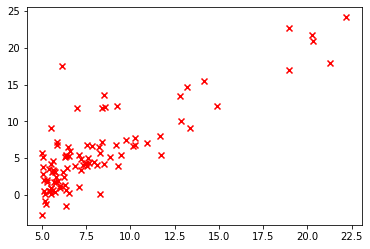

In [5]:
plt.scatter(X[:,-1], Y, c='r', marker='x')

In [6]:
def coste(X, Y, Theta):
    H = np.dot(X, Theta)
    Aux = (H - Y) ** 2
    return Aux.sum() / (2 * len(X))

def descenso_gradiente(X, Y, Theta, alpha):
    NuevaTheta = Theta
    m = np.shape(X)[0]
    n = np.shape(X)[1]
    H = np.dot(X, Theta)
    Aux = (H - Y)
    for i in range(n):
        Aux_i = Aux * X[:, i]
        NuevaTheta[i] -= (alpha / m) * Aux_i.sum()
    return NuevaTheta

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [8]:
def make_data(t0_range, t1_range, X, Y):
    """Genera las matrices X,Y,Z para generar un plot en 3D
    """
    step = 0.1
    Theta0 = np.arange(t0_range[0], t0_range[1], step)
    Theta1 = np.arange(t1_range[0], t1_range[1], step)
    
    Theta0, Theta1 = np.meshgrid(Theta0, Theta1)
    # Theta0 y Theta1 tienen las misma dimensiones, de forma que
    # cogiendo un elemento de cada uno se generan las coordenadas x,y
    # de todos los puntos de la rejilla
    
    Coste = np.empty_like(Theta0)
    for ix, iy in np.ndindex(Theta0.shape):
        Coste[ix, iy] = coste(X, Y, [Theta0[ix, iy], Theta1[ix, iy]])
    return [Theta0, Theta1, Coste]

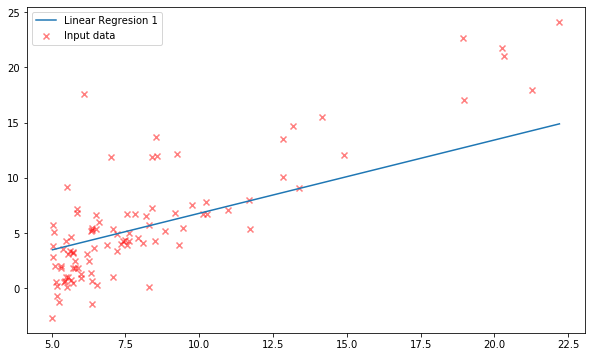

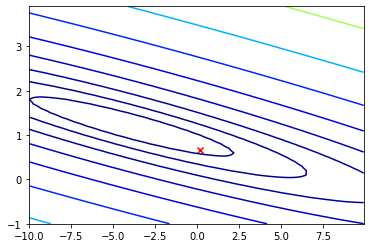

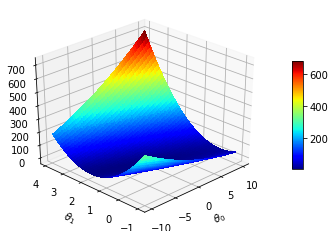

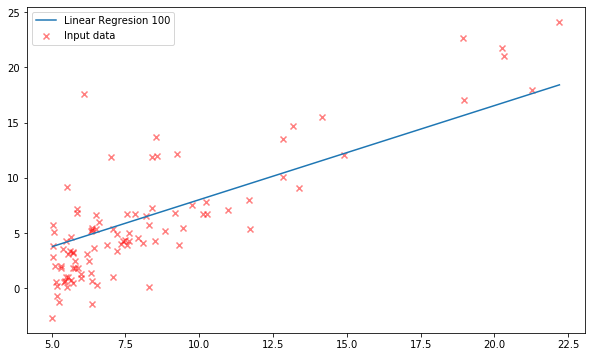

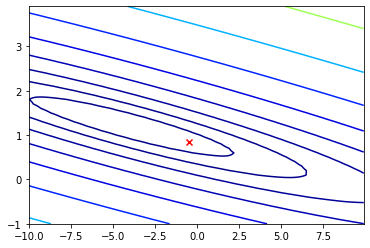

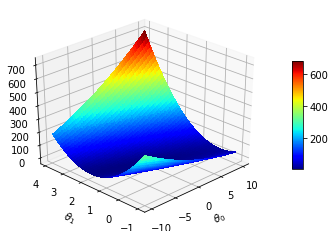

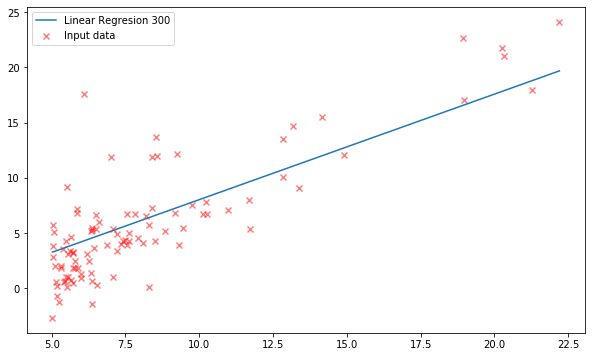

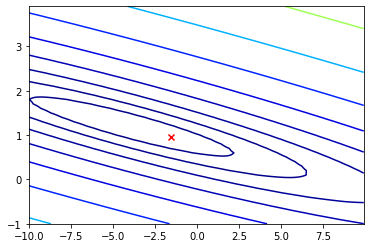

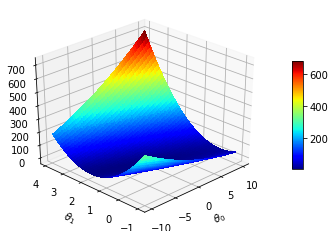

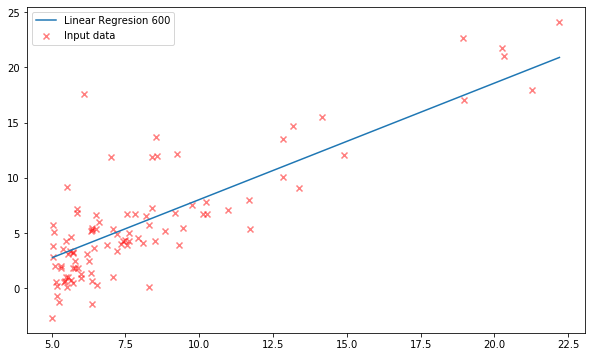

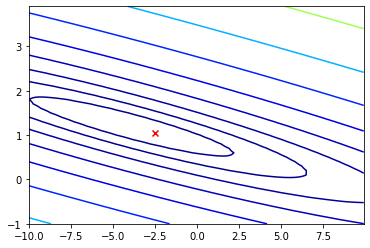

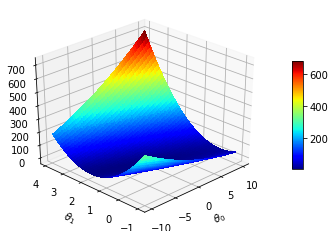

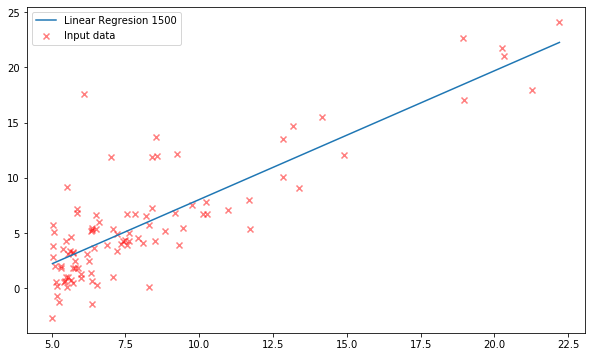

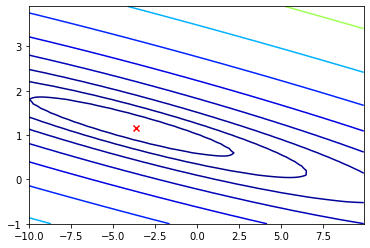

4.483678964704357
[-3.62434423  1.16576489]


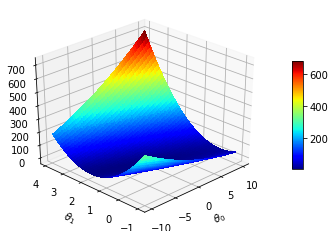

In [177]:
Theta = np.array([0.1,0.1])
alpha = 0.01
x = np.linspace(min(X[:,-1]), max(X[:,-1]))
y = Theta[0] + Theta[1]*x

mostrar = [1,100,300,600,1500]

for i in range(1500): # 1500
    Theta = descenso_gradiente(X, Y, Theta, alpha)
    x = np.linspace(min(X[:,-1]), max(X[:,-1]))
    y = Theta[0] + Theta[1]*x
    cost = coste(X, Y, Theta)
    
    if i+1 in mostrar:
        plt.figure(figsize=(10,6))
        plt.scatter(X[:,-1],Y, c='r', marker='x',alpha=0.5,label="Input data")
        plt.plot(x,y, label="Linear Regresion {}".format(i+1))
        plt.legend()
        plt.show()
        
        data = make_data([-10, 10], [-1, 4], X, Y)
        
        plt.figure()
        plt.contour(data[0], data[1], data[2], np.logspace(-2, 3, 20), cmap=cm.jet)
        plt.scatter(Theta[0], Theta[1], marker='x', c='r')
        plt.show()
        
        fig = plt.figure()
        ax = fig.gca(projection='3d') # Axes3D(fig)
        
        # Plot the surface
        surf = ax.plot_surface(data[0], data[1], data[2], cmap=cm.jet, linewidth=0, antialiased=False)
        ax.scatter(Theta[0], Theta[1], cost, c='r')
        
        # # Customize the Z axis
#         ax.set_zlim(4.3, 6.9)
#         ax.zaxis.set_major_locator(LinearLocator(10))
        # ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

        ax.set_xlabel(r'$\theta_0$')
        ax.set_ylabel(r'$\theta_1$')
        ax.view_init(30, 225)

        # # Add a color bar which maps vañues to colors
        fig.colorbar(surf, shrink=0.5, aspect=10)
        
print(cost)
print(Theta)

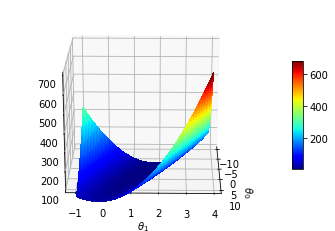

In [136]:
fig = plt.figure()
ax = fig.gca(projection='3d') # Axes3D(fig)

# Make data
data = make_data([-10, 10], [-1, 4], X, Y)

# Plot the surface
surf = ax.plot_surface(data[0], data[1], data[2], cmap=cm.jet, linewidth=0, antialiased=False)

# # Customize the Z axis
ax.set_zlim(100, 700)
# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.view_init(20, 225)

# # Add a color bar which maps vañues to colors
fig.colorbar(surf, shrink=0.5, aspect=10)